<a href="https://colab.research.google.com/github/kjahani/Federated-Machine-Learning/blob/master/Copy_of_Bayesian_Statistics_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
import itertools
from collections import Counter

In [ ]:
mu_0 = 5
sigma_0 = 3
m_1 = 30.25
mu_1 = 5.11
n_1 = 30.02
n_1S_1 = 138.24
ma = lambda mu, sigma: sigma**(-n_1 - 3) * np.exp(-(n_1S_1 + m_1 * (mu - mu_1)**2)/(2 * sigma**2))

In [ ]:
result = []
mu_t = mu_0
sigma_t = sigma_0
f_t = ma(mu_t, sigma_t)
result.append((mu_t, sigma_t))
for _ in range(5000):
    mu_next = mu_t + np.random.normal(0, 0.25)
    sigma_next = sigma_t + np.random.normal(0, 0.25)
    f_next = ma(mu_next, sigma_next)
    r = f_next / f_t
    if np.random.random() < r:
        mu_t = mu_next
        sigma_t = sigma_next
        f_t = f_next
    result.append((mu_t, sigma_t))
result = np.array(result[1000:])  # burn in 廃棄
result.shape

(4001, 2)

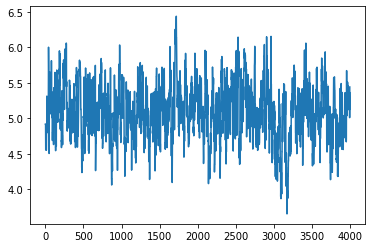

In [ ]:
plt.plot(result.T[0])

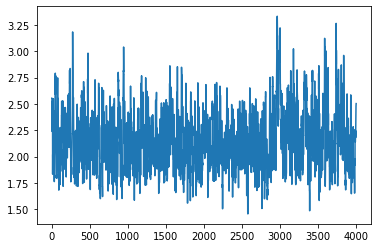

In [ ]:
plt.plot(result.T[1])

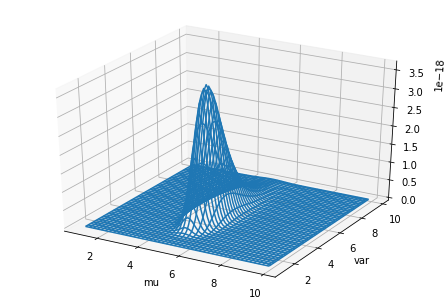

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

mus = np.arange(1, 10, 0.1)
vars_ = np.arange(1, 10, 0.1)
X, Y = np.meshgrid(mus, vars_)
Z = ma(X, np.sqrt(Y))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel('mu')
ax.set_ylabel('var')

plt.show()

20


(array([2., 3., 1., 0., 2., 1., 1., 1., 1., 8.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

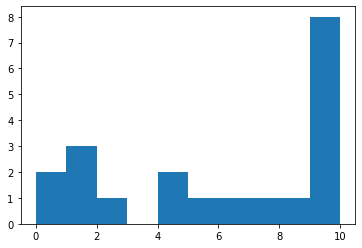

In [ ]:
data = [1, 0, 10, 4, 10, 10, 10, 6, 4, 10, 1, 9, 0, 5, 10, 7, 1, 9, 2, 8]
print(len(data))
plt.hist(data)

In [ ]:
def q(beta, gamma):
    return 1. / (1. + np.exp(-beta - gamma))

def f(beta, sigma, gamma, x):
    gamma_term = np.exp((-1. * gamma**2) / (2. * sigma**2)) / np.abs(sigma)
    result = (q(beta, gamma) ** x) * ((1 - q(beta, gamma)) ** (10 - x)) * gamma_term
    return result

def rprop(beta, sigma, gammas, beta_next, sigma_next, gammas_next, data):
    p = np.array([
        f(beta, sigma, gammas[i], d) for i, d in enumerate(data)
    ])
    p_next = np.array([
        f(beta_next, sigma_next, gammas_next[i], d) for i, d in enumerate(data)
    ])
    r = np.product(p_next / p) * np.exp((beta**2 - beta_next**2) / 200.)
    return r

In [ ]:
result_gammas = []
result_beta = []
result_sigma = []
sigma = 5.
beta = 1.
gammas = [0. for _ in data]

result_beta.append(beta)
result_sigma.append(sigma)
result_gammas.append(gammas)

for _ in range(10000):
    beta_next = beta + np.random.normal(0, .2)
    sigma_next = sigma + np.random.normal(0, .5)
    gammas_next = [g + np.random.normal(0, .3) for g in gammas]
    r = rprop(beta, sigma, gammas, beta_next, sigma_next, gammas_next, data)
    if np.random.random() < r:
        beta = beta_next
        sigma = sigma_next
        gammas = gammas_next

    result_beta.append(beta)
    result_sigma.append(sigma)
    result_gammas.append(gammas)

result_beta = np.array(result_beta[1000:])
result_sigma = np.array(result_sigma[1000:])
result_gammas = np.array(result_gammas[1000:])

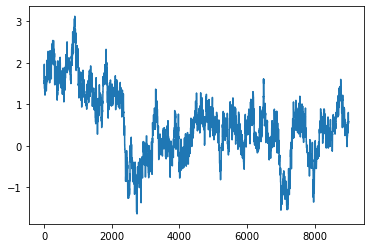

In [ ]:
plt.plot(result_beta)

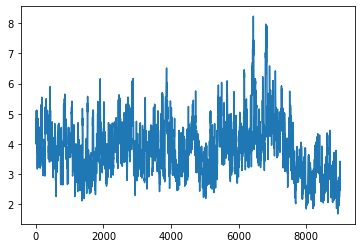

In [ ]:
plt.plot(result_sigma)

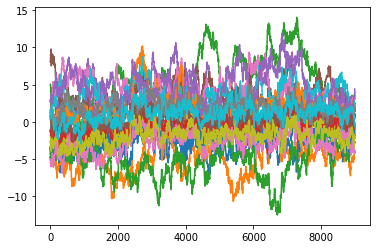

In [ ]:
plt.plot(result_gammas)

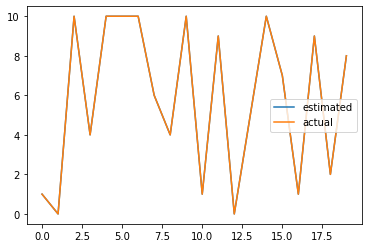

In [ ]:
mean_beta = np.mean(result_beta)
estimated = []
for i, d in enumerate(data):
    gamma_mean = np.mean(result_gammas.T[i])
    estimated.append(round(10. * q(mean_beta, gamma_mean)))
plt.plot(estimated, label='estimated')
plt.plot(data, label='actual')
plt.legend()

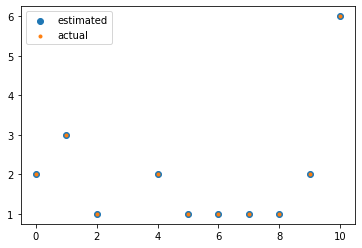

In [ ]:
plt.scatter(*zip(*Counter(estimated).items()), marker='o', label='estimated')
plt.scatter(*zip(*Counter(data).items()), marker='.', label='actual')
plt.legend()